In [2]:
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_df = pd.read_csv('kc_house_data_train.csv')
test_df = pd.read_csv('kc_house_data_test_features.csv')

In [14]:
print(train_df.shape)
train_df.head()

(17290, 22)


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [6]:
keys = list(train_df.keys())
keys

['Unnamed: 0',
 'id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [ ]:
list = ['bedrooms','bathrooms','floors','view','condition','grade','yr_built','yr_renovated']

In [7]:
features = list(train_df.keys())
del features[0]
del features[0]
del features[0]
del features[0]
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [8]:
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]

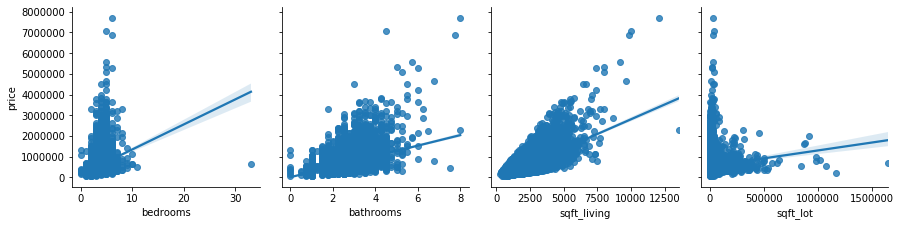

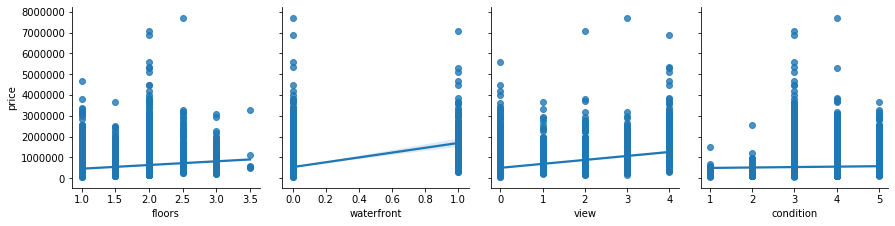

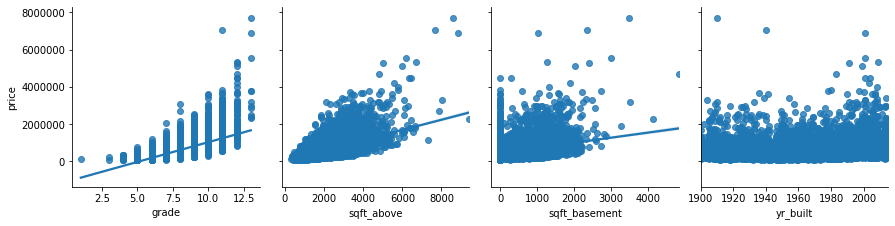

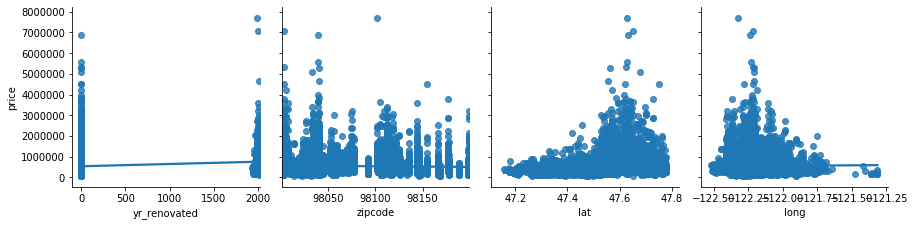

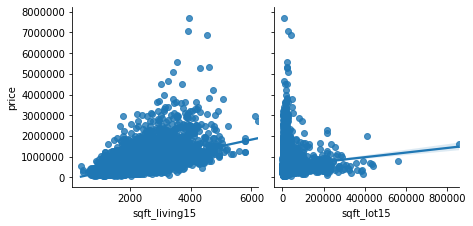

In [9]:
for i in row_groups:
    pp = sns.pairplot(data=train_df, y_vars=['price'],x_vars=i, kind="reg", height=3)

In [13]:
train_df.groupby('yr_renovated')['yr_renovated'].count()

yr_renovated
0       16564
1934        1
1940        2
1944        1
1945        3
        ...  
2011        8
2012        9
2013       30
2014       71
2015       12
Name: yr_renovated, Length: 69, dtype: int64

In [51]:
def plot_trend(df, x_col, y_col):
    mean_df = train_df.groupby(x_col)[y_col].mean()
    fig, ax = plt.subplots()
    ax.plot(mean_df.index, mean_df.values)
    return train_df.groupby(x_col)[y_col].count()

bedrooms
0       12
1      160
2     2204
3     7864
4     5488
5     1283
6      229
7       30
8       10
9        5
10       3
11       1
33       1
Name: price, dtype: int64

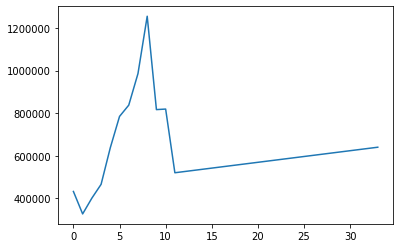

In [52]:
brcount_df = plot_trend(train_df, 'bedrooms', 'price')
brcount_df

bathrooms
0.00       8
0.50       3
0.75      52
1.00    3100
1.25       6
1.50    1168
1.75    2431
2.00    1549
2.25    1666
2.50    4322
2.75     896
3.00     592
3.25     455
3.50     591
3.75     135
4.00     107
4.25      64
4.50      76
4.75      16
5.00      17
5.25      11
5.50       7
5.75       3
6.00       6
6.25       2
6.50       1
6.75       2
7.50       1
7.75       1
8.00       2
Name: price, dtype: int64

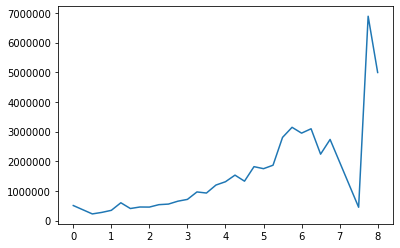

In [53]:
bathcount_df = plot_trend(train_df, 'bathrooms', 'price')
bathcount_df

floors
1.0    8606
1.5    1524
2.0    6538
2.5     140
3.0     475
3.5       7
Name: price, dtype: int64

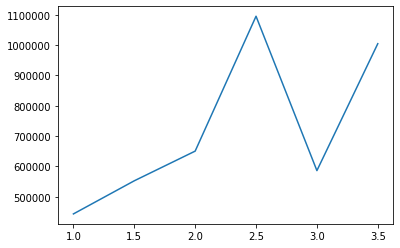

In [54]:
floorcount_df = plot_trend(train_df, 'floors', 'price')
floorcount_df

view
0    15571
1      264
2      775
3      410
4      270
Name: price, dtype: int64

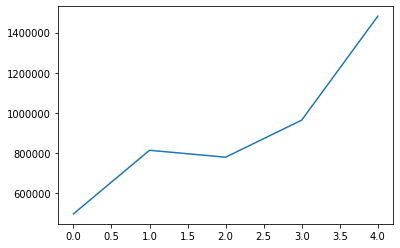

In [55]:
viewrcount_df = plot_trend(train_df, 'view', 'price')
viewrcount_df

condition
1       24
2      139
3    11244
4     4516
5     1367
Name: price, dtype: int64

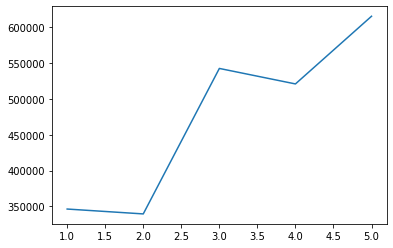

In [57]:
conditioncount_df = plot_trend(train_df, 'condition', 'price')
conditioncount_df

grade
1        1
3        2
4       22
5      192
6     1648
7     7183
8     4848
9     2099
10     893
11     319
12      72
13      11
Name: price, dtype: int64

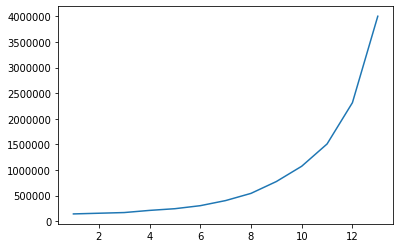

In [59]:
gradecount_df = plot_trend(train_df, 'grade', 'price')
gradecount_df

In [21]:
train_df.groupby('grade')['price'].mean()

grade
1     1.420000e+05
3     1.685000e+05
4     2.106386e+05
5     2.438372e+05
6     3.026820e+05
7     4.025267e+05
8     5.430105e+05
9     7.741618e+05
10    1.072903e+06
11    1.507967e+06
12    2.314347e+06
13    4.002727e+06
Name: price, dtype: float64

yr_built
1900     70
1901     25
1902     22
1903     36
1904     36
1905     57
1906     73
1907     52
1908     69
1909     75
1910    112
1911     56
1912     67
1913     45
1914     41
1915     54
1916     62
1917     46
1918    100
1919     68
1920     74
1921     62
1922     74
1923     66
1924    111
1925    139
1926    151
1927    100
1928    105
1929     84
1930     77
1931     46
1932     28
1933     27
1934     19
1935     18
1936     36
1937     47
1938     43
1939     82
1940    117
1941    133
1942    188
1943    136
1944    115
1945     73
1946    101
1947    213
1948    180
1949    150
Name: price, dtype: int64

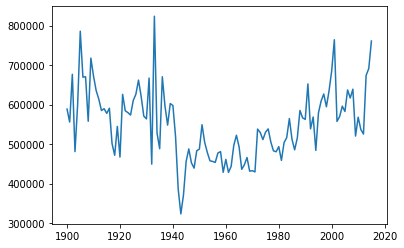

In [65]:
yrbuilt_count_df = plot_trend(train_df, 'yr_built', 'price')
yrbuilt_count_df.head(50)

yr_renovated
0       16564
1934        1
1940        2
1944        1
1945        3
1946        2
1948        1
1950        2
1951        1
1953        3
1955        3
1956        2
1957        2
1958        3
1959        1
1960        3
1962        2
1963        3
1964        4
1965        4
1967        2
1968        6
1969        2
1970        7
1971        2
1972        3
1973        4
1974        2
1975        5
1976        3
1977        6
1978        5
1979        7
1980        7
1981        3
1982        7
1983       11
1984       12
1985       15
1986       14
1987       16
1988       12
1989       21
1990       21
1991       15
1992        9
1993       14
1994       13
1995       16
1996       14
Name: price, dtype: int64

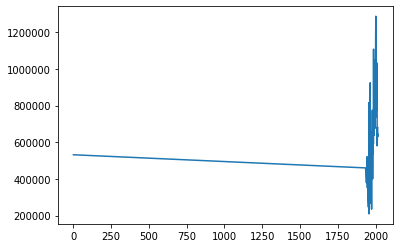

In [66]:

yrren_count_df = plot_trend(train_df, 'yr_renovated', 'price')
yrren_count_df.head(50)

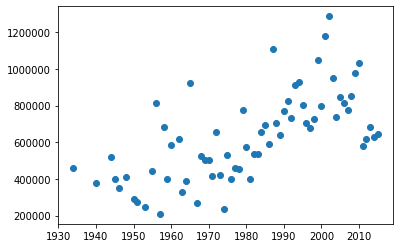

In [31]:
filt_ren = train_df[train_df['yr_renovated']>0].groupby('yr_renovated')['price'].mean()
fig, ax = plt.subplots()
ax.scatter(filt_ren.index, filt_ren.values)

In [20]:
train_df.corr().iloc[:,:11]

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition
Unnamed: 0,1.000000e+00,-0.006139,-0.012306,-0.010271,-0.004940,-0.008900,-0.003500,0.010599,-0.008845,-6.278161e-07,-0.001781
id,-6.138777e-03,1.000000,-0.015644,-0.001529,0.003833,-0.014251,-0.129837,0.017126,0.000101,1.259374e-02,-0.014272
price,-1.230630e-02,-0.015644,1.000000,0.305106,0.524335,0.703540,0.086803,0.256985,0.275779,3.954851e-01,0.036099
bedrooms,-1.027127e-02,-0.001529,0.305106,1.000000,0.507867,0.570428,0.029375,0.172975,-0.008581,7.974076e-02,0.025266
bathrooms,-4.939574e-03,0.003833,0.524335,0.507867,1.000000,0.755270,0.085470,0.497967,0.065848,1.888170e-01,-0.122976
sqft_living,-8.900440e-03,-0.014251,0.703540,0.570428,0.755270,1.000000,0.166810,0.357169,0.109738,2.833358e-01,-0.061530
sqft_lot,-3.500101e-03,-0.129837,0.086803,0.029375,0.085470,0.166810,1.000000,-0.002205,0.015356,7.305841e-02,-0.013715
floors,1.059874e-02,0.017126,0.256985,0.172975,0.497967,0.357169,-0.002205,1.000000,0.025132,2.588299e-02,-0.259230
waterfront,-8.844970e-03,0.000101,0.275779,-0.008581,0.065848,0.109738,0.015356,0.025132,1.000000,4.075653e-01,0.009608
view,-6.278161e-07,0.012594,0.395485,0.079741,0.188817,0.283336,0.073058,0.025883,0.407565,1.000000e+00,0.045060


In [19]:
train_df.corr().iloc[:,11:]

,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
Unnamed: 0,-0.005015,-0.003406,-0.012104,0.007496,-0.003423,0.006218,0.002470,-0.006992,-0.008961,0.000463
id,0.003163,-0.013932,-0.003516,0.013697,-0.019560,-0.008166,-0.001865,0.017388,-0.007494,-0.139605
price,0.666215,0.607760,0.323312,0.056450,0.117770,-0.048958,0.302394,0.019327,0.585567,0.081423
bedrooms,0.354679,0.472492,0.300085,0.153769,0.013679,-0.147515,-0.002170,0.124279,0.387589,0.026665
bathrooms,0.664191,0.686853,0.282700,0.507761,0.048140,-0.201527,0.023074,0.221308,0.568080,0.086499
sqft_living,0.762929,0.876696,0.435529,0.319397,0.051448,-0.195893,0.052646,0.234453,0.755066,0.179570
sqft_lot,0.110320,0.180755,0.008065,0.054228,0.004520,-0.126590,-0.082029,0.226190,0.136959,0.701875
floors,0.458984,0.528509,-0.247481,0.483657,0.005985,-0.060560,0.048227,0.128795,0.283933,-0.008170
waterfront,0.092234,0.077162,0.083433,-0.021981,0.094268,0.034282,-0.013331,-0.042728,0.091090,0.026895
view,0.249554,0.164747,0.279939,-0.049593,0.091291,0.089475,0.003820,-0.077572,0.279999,0.073185


In [33]:
test_df.groupby('yr_renovated')['grade'].count()

yr_renovated
0       4184
1946       1
1957       1
1958       2
1960       1
1964       2
1965       3
1968       1
1970       2
1972       2
1974       1
1975       1
1979       2
1980       1
1981       1
1983       1
1984       4
1986       2
1987       2
1988       4
1989       3
1990       1
1991       3
1992       3
1993       4
1994       2
1995       3
1996       4
1997       3
1998       5
1999       3
2000       5
2001       3
2002       1
2003       4
2004       3
2005       4
2006       7
2007      10
2008       3
2009       5
2011       2
2012       2
2013       7
2014      13
2015       2
Name: grade, dtype: int64